In [80]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2
import extcolors
from colormap import rgb2hex

C:\Users\Nickv\AppData\Local\Temp\ipykernel_48404\4218563506.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((output_width,hsize), Image.ANTIALIAS)


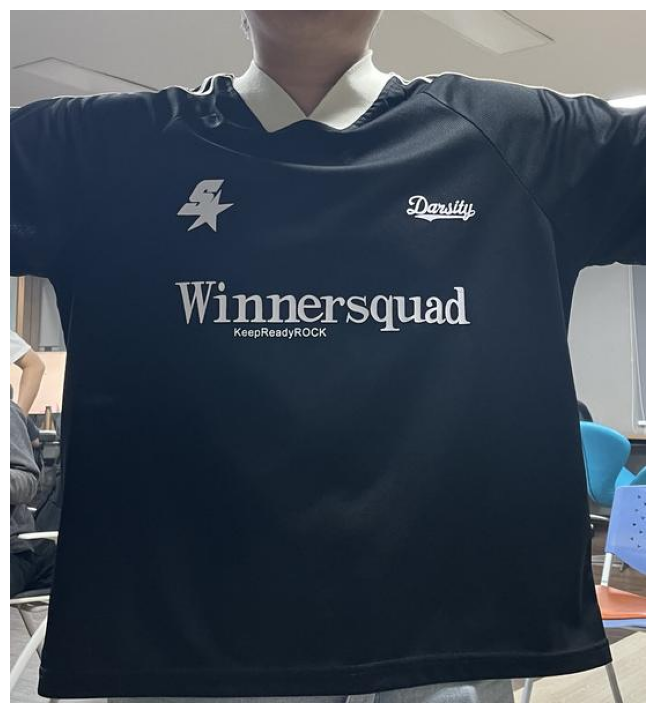

In [81]:
input_name = os.path.join('data\Test\Topwear', 'Park.jpg')
output_width = 900
img = Image.open(input_name)
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize), Image.ANTIALIAS)
img = img.crop((150, 400, 700, 1000))

resize_name = os.path.join('data\Test\ResizedTop', 'Resized_Park.jpg')
img.save(resize_name)

#read
plt.figure(figsize=(9, 9))
img_url = resize_name
img = plt.imread(img_url)
plt.imshow(img)
plt.axis('off')
plt.show()

In [82]:
colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit = 12)
colors_x

([((18, 28, 38), 196525),
  ((173, 169, 158), 43356),
  ((33, 48, 71), 40488),
  ((125, 126, 121), 11853),
  ((92, 80, 82), 11286),
  ((214, 207, 191), 6811),
  ((59, 71, 85), 4944),
  ((89, 101, 115), 2507),
  ((251, 255, 255), 2303),
  ((126, 164, 229), 1965),
  ((61, 132, 174), 1799),
  ((151, 158, 168), 1648)],
 330000)

In [83]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color

,c_code,occurence
0,#121C26,196525
1,#ADA99E,43356
2,#213047,40488
3,#7D7E79,11853
4,#5C5052,11286
5,#D6CFBF,6811
6,#3B4755,4944
7,#596573,2507
8,#FBFFFF,2303
9,#7EA4E5,1965


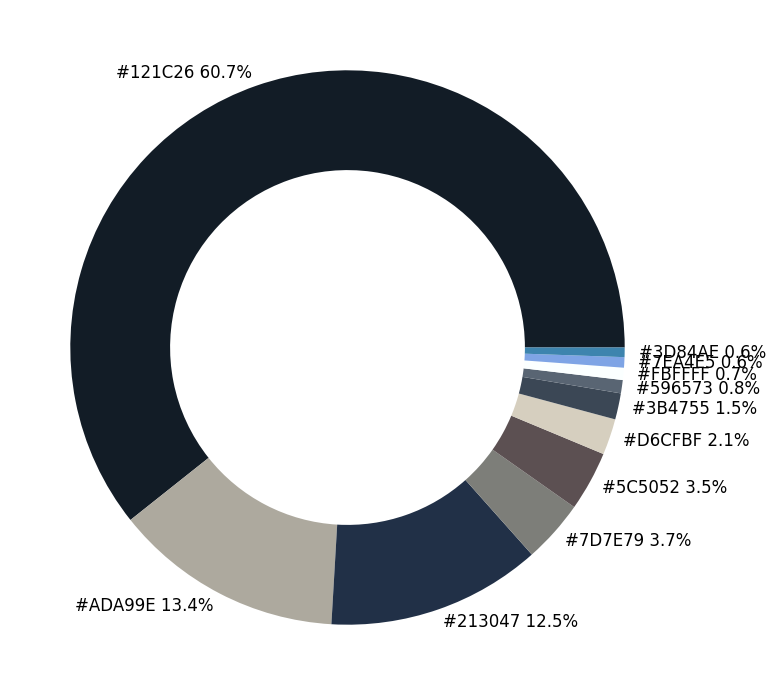

In [59]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

In [60]:
LVC, percents_LVC = text_c[0].split()
LVC = LVC[1::]
LVC

'121C26'

In [61]:
def hex_to_rgb(hex):
  rgb = []
  for i in (0, 2, 4):
    decimal = int(hex[i:i+2], 16)
    rgb.append(decimal)
  
  return tuple(rgb)

In [62]:
ParkRGB = hex_to_rgb(LVC)

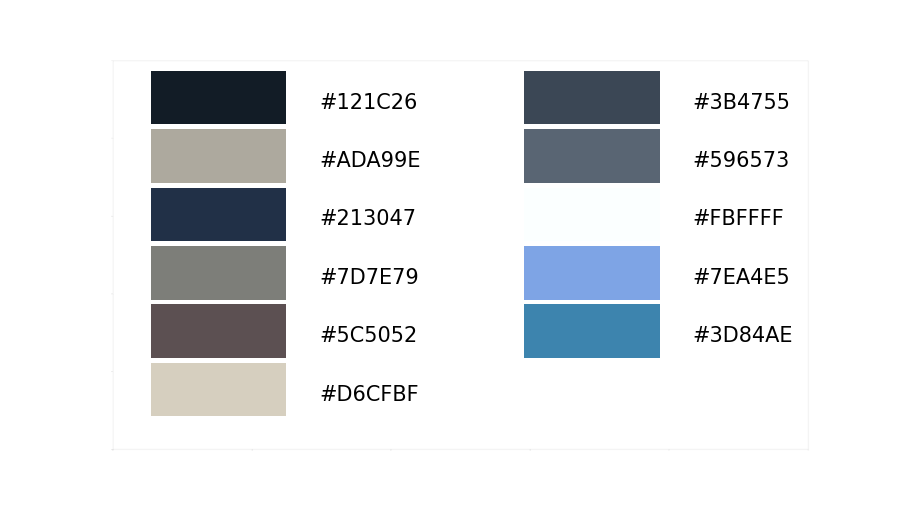

In [63]:
#create background color
fig, ax = plt.subplots(figsize=(192,108),dpi=10)
fig.set_facecolor('white')
plt.savefig('bg.png')
plt.close(fig)

#create color palette
bg = plt.imread('bg.png')
fig = plt.figure(figsize=(90, 90), dpi = 10)
ax = fig.add_subplot(1,1,1)

x_posi, y_posi, y_posi2 = 320, 25, 25
for c in list_color:
    if  list_color.index(c) <= 5:
        y_posi += 125
        rect = patches.Rectangle((x_posi, y_posi), 290, 115, facecolor = c)
        ax.add_patch(rect)
        ax.text(x = x_posi+360, y = y_posi+80, s = c, fontdict={'fontsize': 150})
    else:
        y_posi2 += 125
        rect = patches.Rectangle((x_posi + 800, y_posi2), 290, 115, facecolor = c)
        ax.add_artist(rect)
        ax.text(x = x_posi+1160, y = y_posi2+80, s = c, fontdict={'fontsize': 150})
        
ax.axis('off')
plt.imshow(bg)
plt.tight_layout()

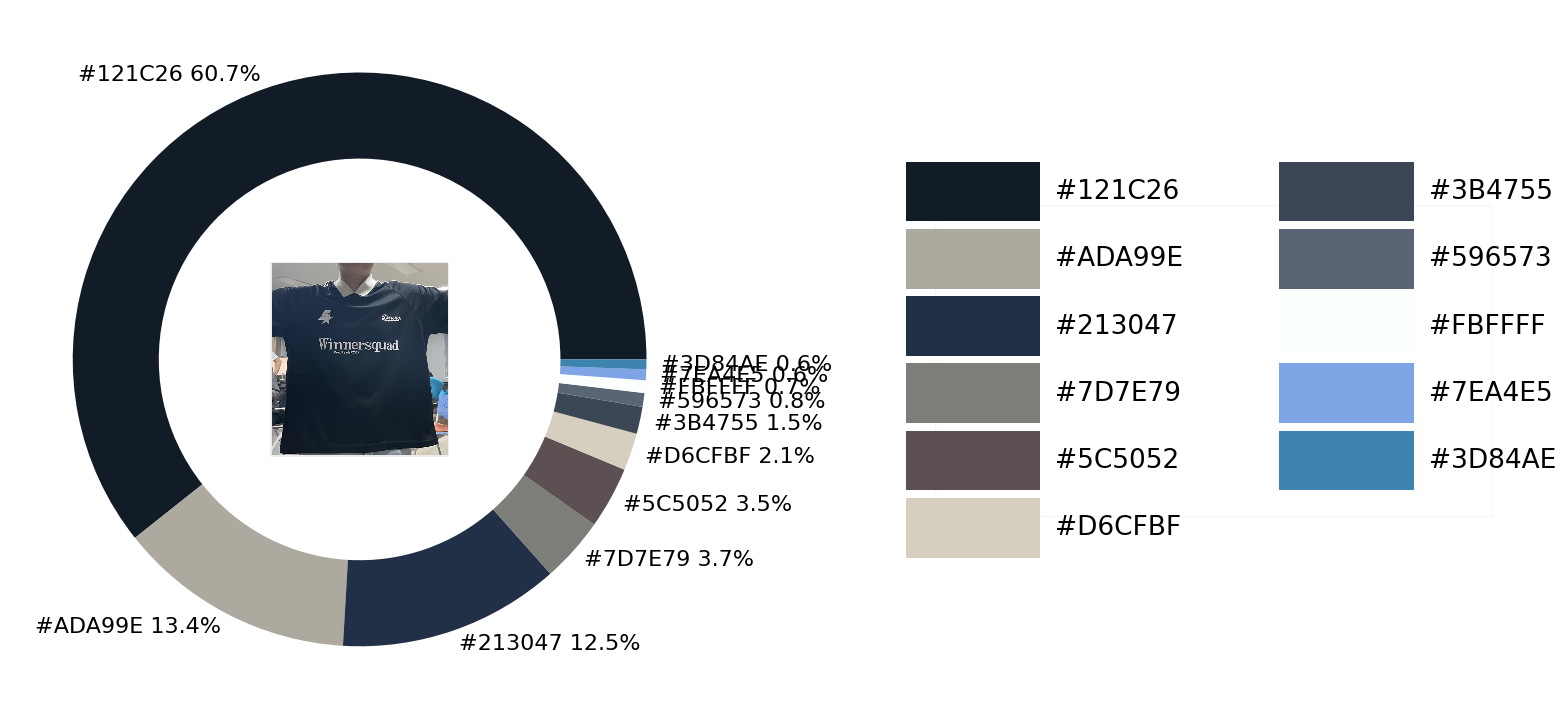

In [64]:
bg = plt.imread('bg.png')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)

#donut plot
wedges, text = ax1.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 160, 'color':'black'})
plt.setp(wedges, width=0.3)

#add image in the center of donut plot
imagebox = OffsetImage(img, zoom=2.3)
ab = AnnotationBbox(imagebox, (0, 0))
ax1.add_artist(ab)

#color palette
x_posi, y_posi, y_posi2 = 160, -170, -170
for c in list_color:
    if list_color.index(c) <= 5:
        y_posi += 180
        rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
        ax2.add_patch(rect)
        ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
    else:
        y_posi2 += 180
        rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
        ax2.add_artist(rect)
        ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

ax2.axis('off')
fig.set_facecolor('white')
plt.imshow(bg)       
plt.tight_layout()

In [65]:
def exact_color(input_image, resize, tolerance, zoom):
    #background
    bg = 'bg.png'
    fig, ax = plt.subplots(figsize=(192,108),dpi=10)
    fig.set_facecolor('white')
    plt.savefig(bg)
    plt.close(fig)
    
    #resize
    output_width = resize
    img = Image.open(input_image)
    if img.size[0] >= resize:
        wpercent = (output_width/float(img.size[0]))
        hsize = int((float(img.size[1])*float(wpercent)))
        img = img.resize((output_width,hsize), Image.ANTIALIAS)
        resize_name = 'resize_'+ input_image
        img.save(resize_name)
    else:
        resize_name = input_image
    
    #crate dataframe
    img_url = resize_name
    colors_x = extcolors.extract_from_path(img_url, tolerance = tolerance, limit = 13)
    df_color = color_to_df(colors_x)
    
    #annotate text
    list_color = list(df_color['c_code'])
    list_precent = [int(i) for i in list(df_color['occurence'])]
    text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color, list_precent)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)
    
    #donut plot
    wedges, text = ax1.pie(list_precent,
                           labels= text_c,
                           labeldistance= 1.05,
                           colors = list_color,
                           textprops={'fontsize': 150, 'color':'black'})
    plt.setp(wedges, width=0.3)

    #add image in the center of donut plot
    img = mpimg.imread(resize_name)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (0, 0))
    ax1.add_artist(ab)
    
    #color palette
    x_posi, y_posi, y_posi2 = 160, -170, -170
    for c in list_color:
        if list_color.index(c) <= 5:
            y_posi += 180
            rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
            ax2.add_patch(rect)
            ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
        else:
            y_posi2 += 180
            rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
            ax2.add_artist(rect)
            ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

    fig.set_facecolor('white')
    ax2.axis('off')
    bg = plt.imread('bg.png')
    plt.imshow(bg)       
    plt.tight_layout()
    return plt.show()

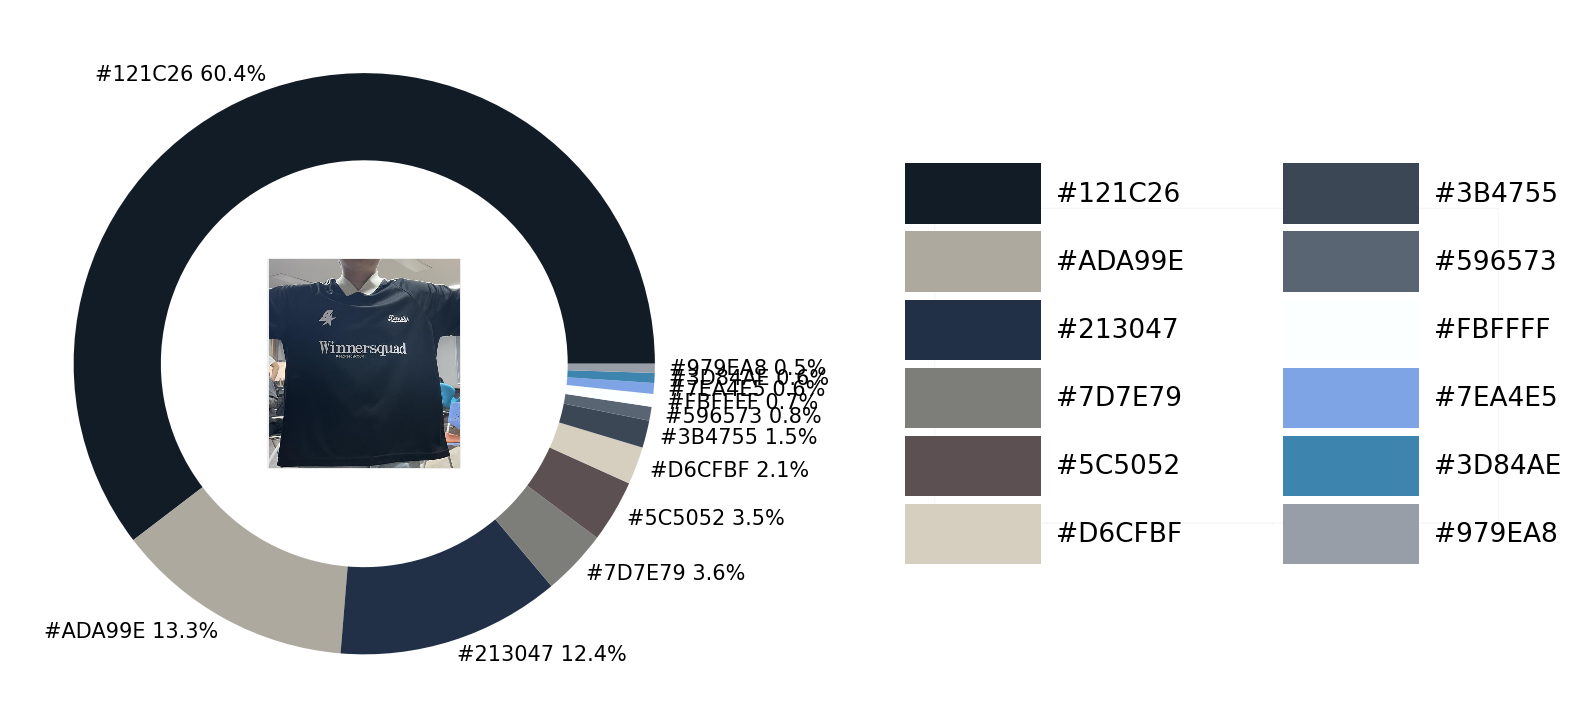

In [66]:
resize_name = os.path.join('data\Test', 'Resized_Poon.jpg')
exact_color(resize_name, 900, 12, 2.5)

In [67]:
def cosine(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [68]:
cosine(ParkRGB, (20, 20, 15))

0.9212637878987175

C:\Users\Nickv\AppData\Local\Temp\ipykernel_48404\1604278464.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((output_width,hsize), Image.ANTIALIAS)


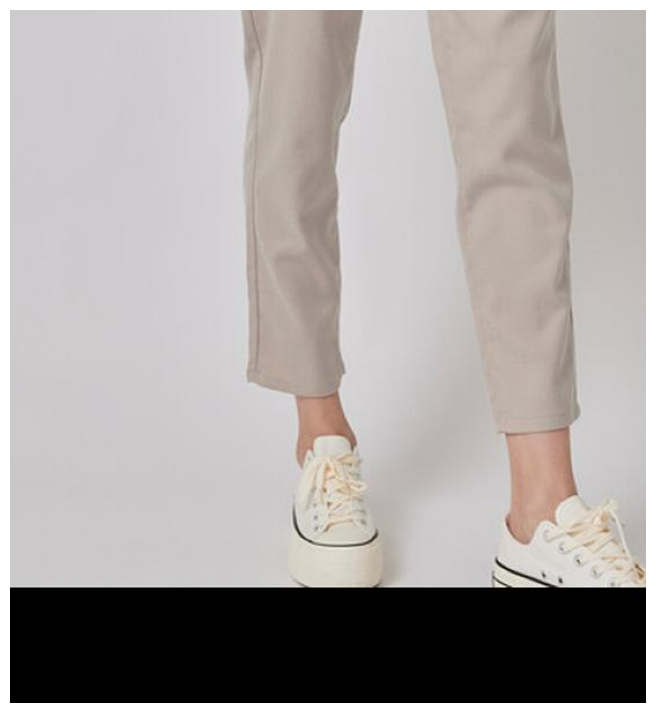

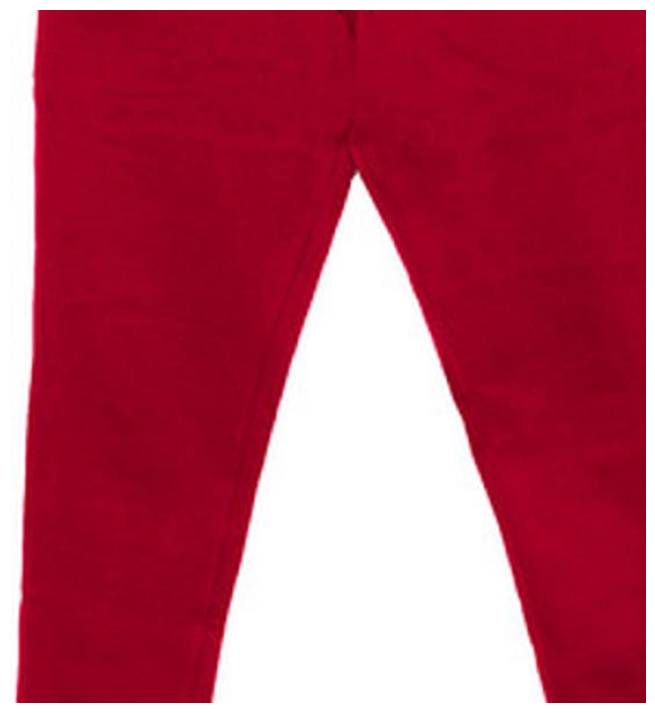

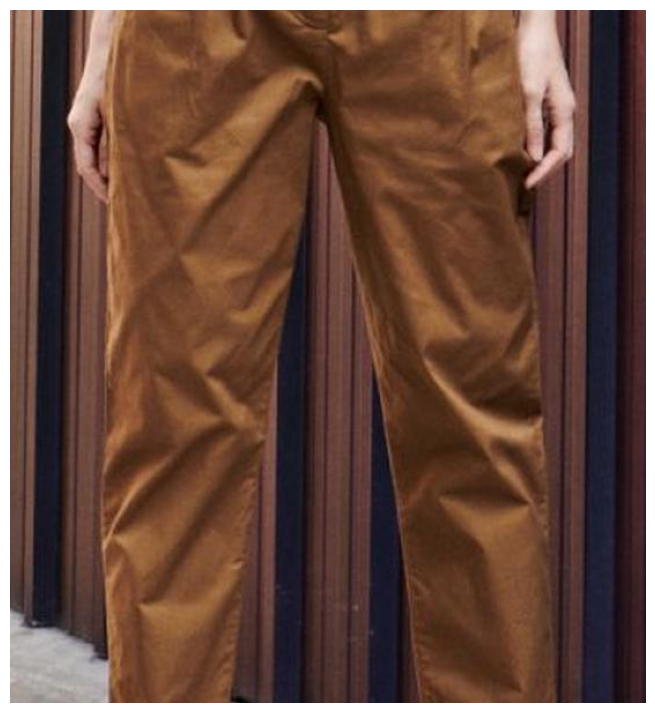

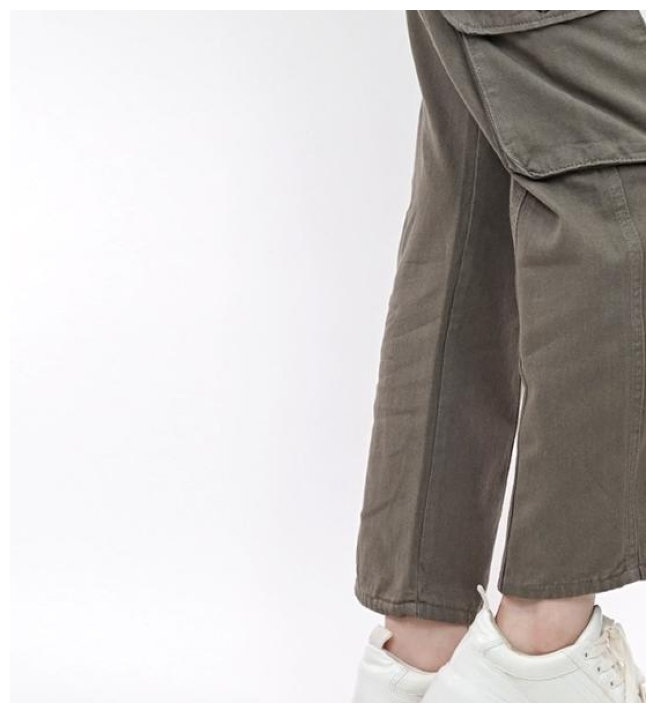

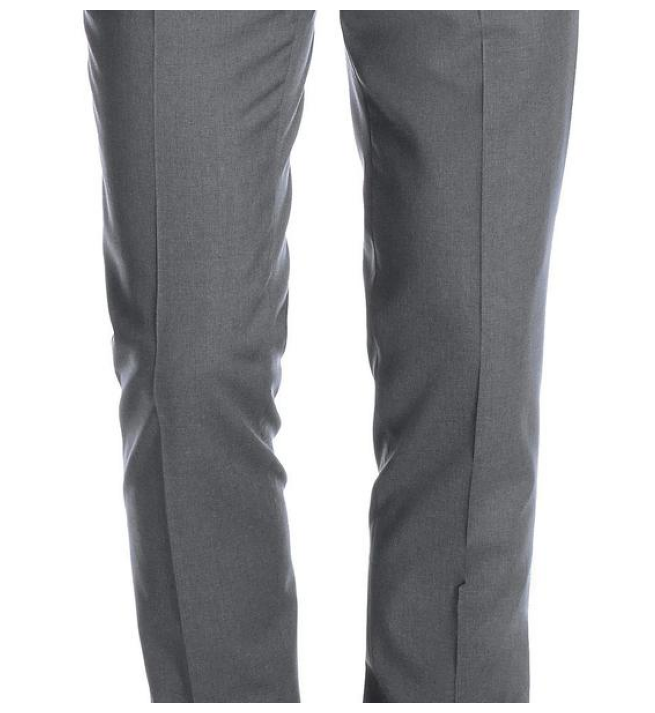

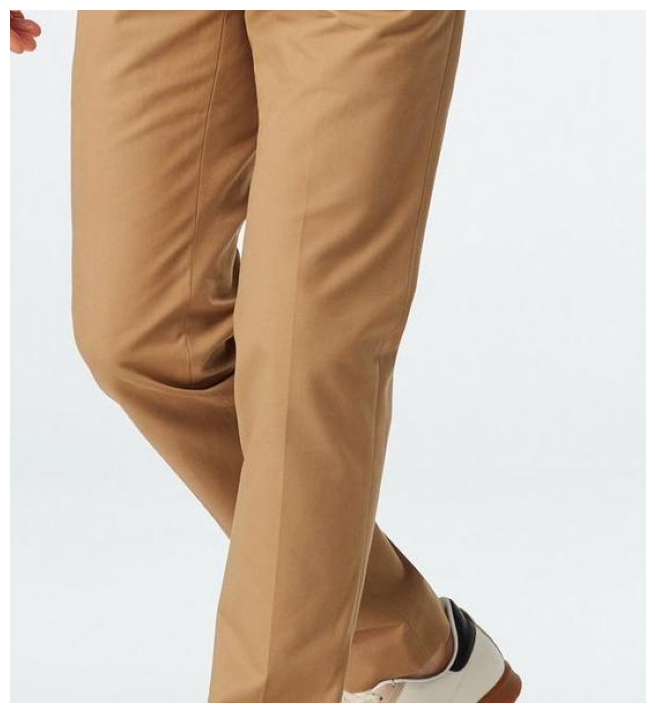

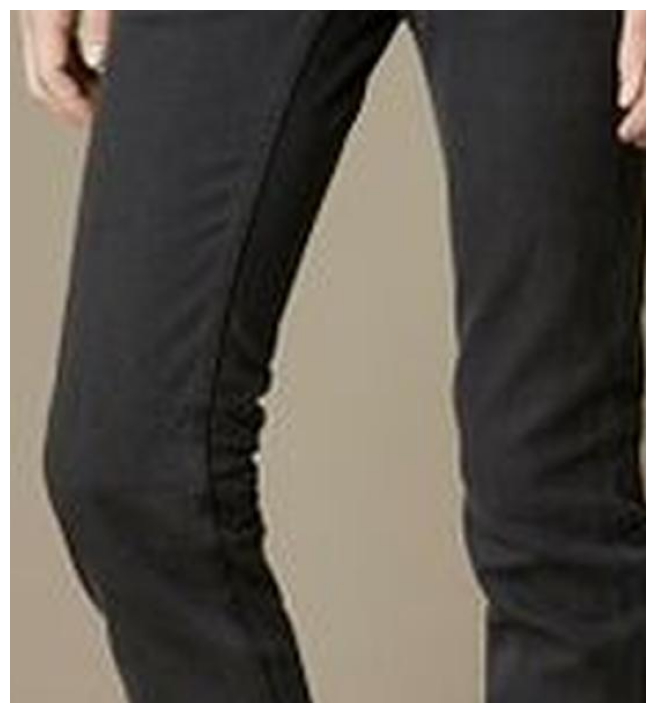

In [79]:
data_dir = 'data/Test/'
image_no = 1
for image in os.listdir(os.path.join(data_dir, 'Bottomwear')):
    input_name = os.path.join(data_dir, 'Bottomwear', image)
    output_width = 900
    img = Image.open(input_name)
    wpercent = (output_width/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((output_width,hsize), Image.ANTIALIAS)
    img = img.crop((150, 400, 700, 1000))

    resize_name = os.path.join('data\Test\ResizedBottom', str(image_no) + '.jpg')
    img.save(resize_name)
    image_no += 1

image_no = 1
for image in os.listdir(os.path.join(data_dir, 'ResizedBottom')):
    plt.figure(figsize=(9, 9))
    img_url = os.path.join('data\Test\ResizedBottom', str(image_no) + '.jpg')
    img = plt.imread(img_url)
    image_no += 1
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [70]:
color_x_list = []
for i in range(len(os.listdir(os.path.join('data\Test\ResizedBottom')))):
    img_url = os.path.join('data\Test\ResizedBottom', str(i + 1) + '.jpg')
    colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit = 12)
    color_x_list.append(colors_x)
color_x_list

[([((205, 203, 206), 221775),
   ((0, 0, 0), 55040),
   ((189, 176, 167), 41613),
   ((156, 142, 133), 6163),
   ((202, 164, 145), 3329),
   ((222, 207, 188), 833),
   ((179, 128, 109), 776),
   ((94, 91, 82), 225),
   ((138, 109, 95), 104),
   ((67, 63, 60), 75),
   ((240, 237, 228), 36),
   ((37, 34, 29), 19)],
  330000),
 ([((150, 1, 33), 242411),
   ((255, 255, 255), 82055),
   ((209, 91, 117), 991),
   ((255, 228, 233), 917),
   ((192, 36, 75), 759),
   ((186, 3, 49), 709),
   ((255, 204, 220), 667),
   ((226, 126, 152), 618),
   ((247, 175, 189), 577),
   ((150, 34, 55), 117),
   ((116, 0, 19), 57),
   ((213, 138, 143), 35)],
  330000),
 ([((93, 55, 34), 144959),
   ((128, 79, 49), 48090),
   ((25, 24, 42), 42938),
   ((77, 49, 45), 41795),
   ((30, 15, 18), 11663),
   ((113, 81, 70), 11486),
   ((158, 107, 64), 9150),
   ((180, 176, 173), 5129),
   ((226, 193, 184), 4632),
   ((151, 114, 96), 4360),
   ((59, 30, 14), 2214),
   ((197, 160, 144), 1568)],
  330000),
 ([((249, 249, 

In [71]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color_list = []
for colors in color_x_list:
    df_color = color_to_df(colors)
    df_color_list.append(df_color)

df_color_list

[     c_code occurence
 0   #CDCBCE    221775
 1   #000000     55040
 2   #BDB0A7     41613
 3   #9C8E85      6163
 4   #CAA491      3329
 5   #DECFBC       833
 6   #B3806D       776
 7   #5E5B52       225
 8   #8A6D5F       104
 9   #433F3C        75
 10  #F0EDE4        36,
      c_code occurence
 0   #960121    242411
 1   #FFFFFF     82055
 2   #D15B75       991
 3   #FFE4E9       917
 4   #C0244B       759
 5   #BA0331       709
 6   #FFCCDC       667
 7   #E27E98       618
 8   #F7AFBD       577
 9   #962237       117
 10  #740013        57,
      c_code occurence
 0   #5D3722    144959
 1   #804F31     48090
 2   #19182A     42938
 3   #4D312D     41795
 4   #1E0F12     11663
 5   #715146     11486
 6   #9E6B40      9150
 7   #B4B0AD      5129
 8   #E2C1B8      4632
 9   #977260      4360
 10  #3B1E0E      2214,
      c_code occurence
 0   #F9F9FB    207572
 1   #635A51     95340
 2   #7D7872      8917
 3   #3A3531      8073
 4   #C7A69D      5950
 5   #D8D9D4      2869
 6   #A0

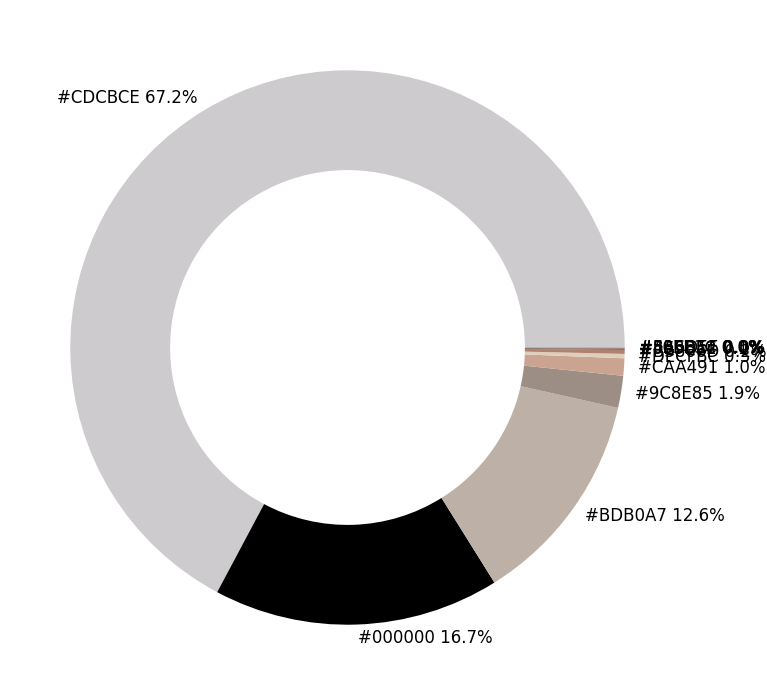

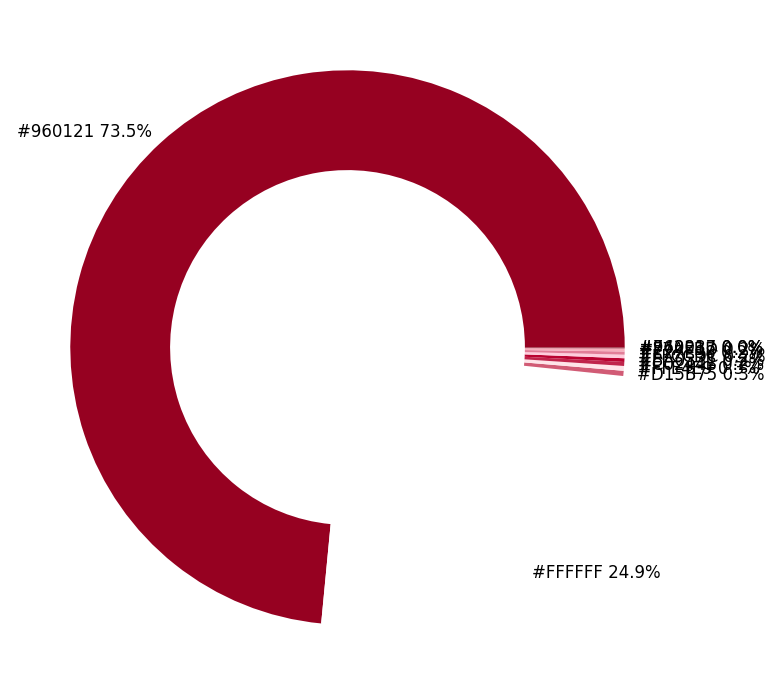

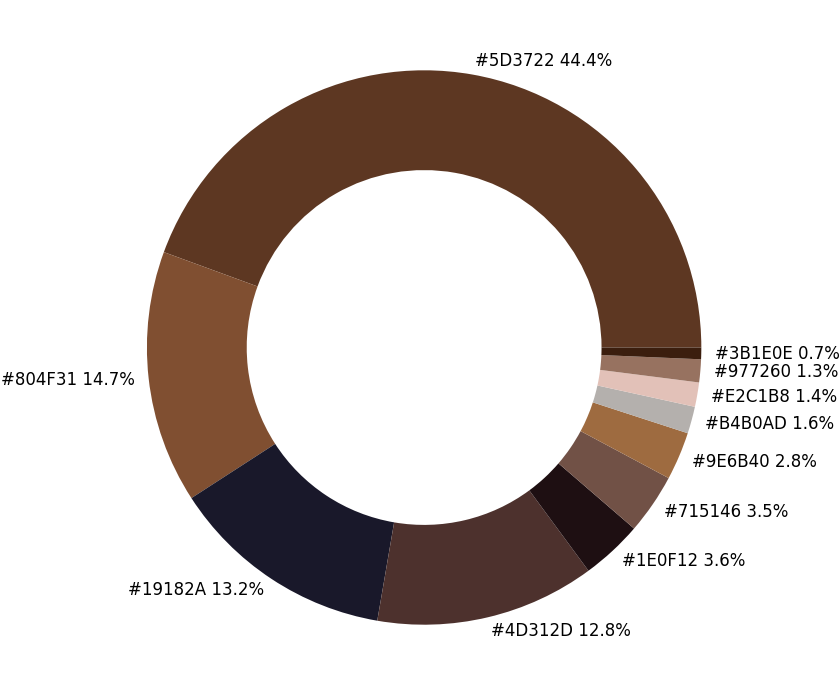

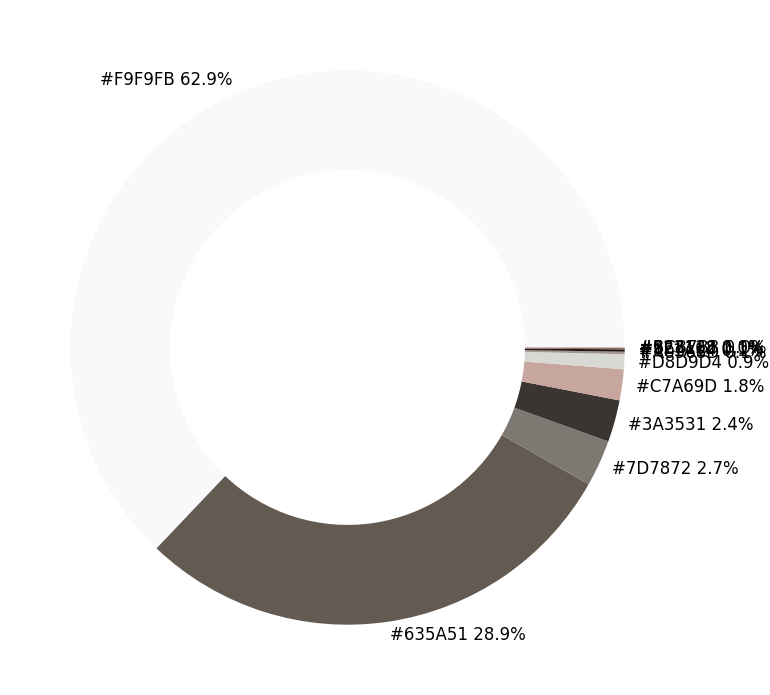

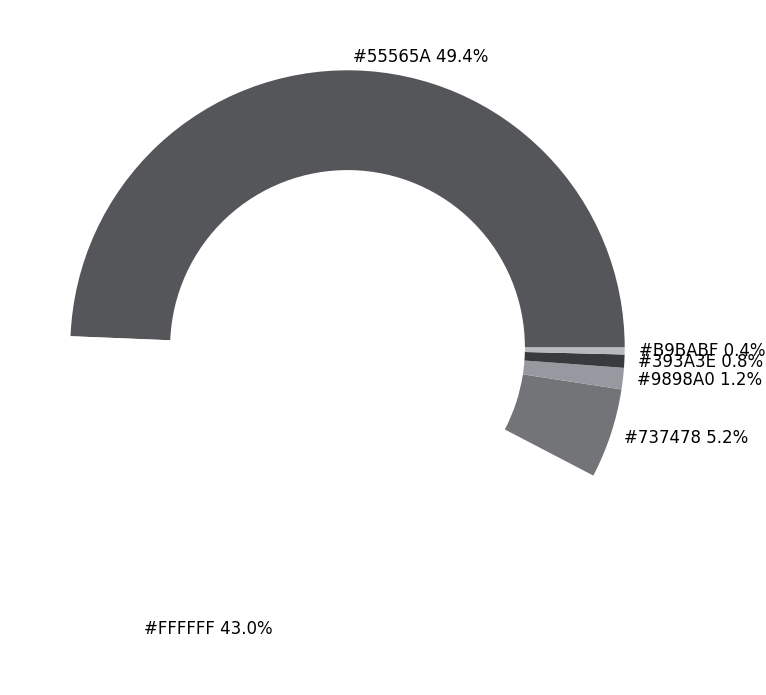

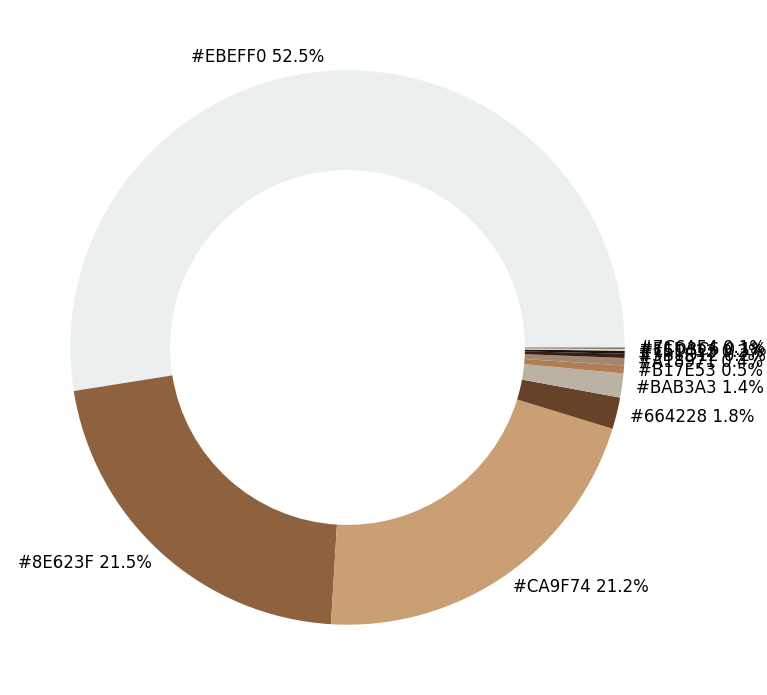

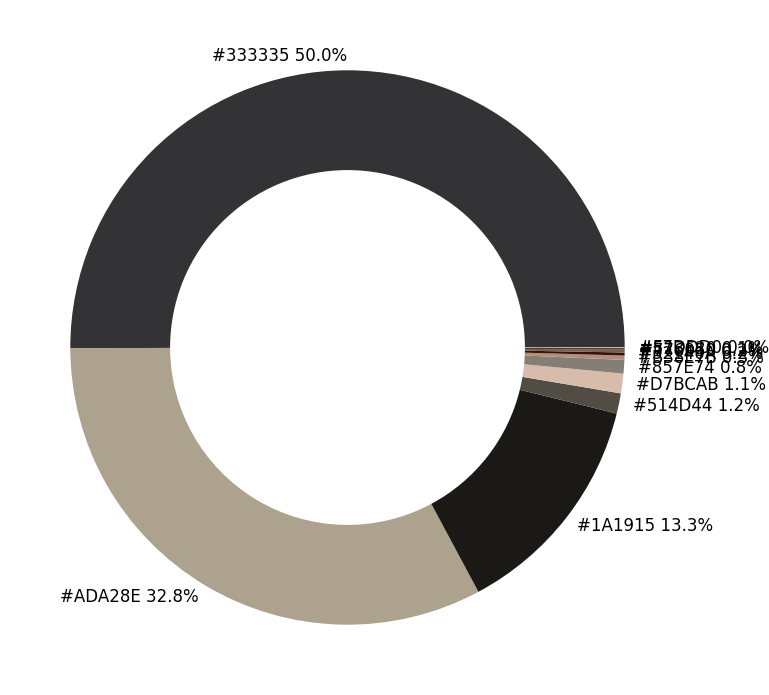

In [72]:
text_c_list = []
for df_color in df_color_list:
    list_color = list(df_color['c_code'])
    list_precent = [int(i) for i in list(df_color['occurence'])]
    text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                                list_precent)]
    text_c_list.append(text_c)
    fig, ax = plt.subplots(figsize=(90,90),dpi=10)
    wedges, text = ax.pie(list_precent,
                        labels= text_c,
                        labeldistance= 1.05,
                        colors = list_color,
                        textprops={'fontsize': 120, 'color':'black'}
                        )
    plt.setp(wedges, width=0.3)

    #create space in the center
    plt.setp(wedges, width=0.36)

    ax.set_aspect("equal")
    fig.set_facecolor('white')

In [73]:
LVC_list = []
for text_c in text_c_list:
    LVC, percents_LVC = text_c[0].split()
    LVC = LVC[1::]
    LVC_list.append(LVC)
LVC_list

['CDCBCE', '960121', '5D3722', 'F9F9FB', '55565A', 'EBEFF0', '333335']

In [74]:
def hex_to_rgb(hex):
  rgb = []
  for i in (0, 2, 4):
    decimal = int(hex[i:i+2], 16)
    rgb.append(decimal)
  
  return tuple(rgb)

In [75]:
RGB_list = []
for LVC in LVC_list:
    RGB = hex_to_rgb(LVC)
    RGB_list.append(RGB)
RGB_list

[(205, 203, 206),
 (150, 1, 33),
 (93, 55, 34),
 (249, 249, 251),
 (85, 86, 90),
 (235, 239, 240),
 (51, 51, 53)]

In [76]:
cosine_sim = []
for RGB in RGB_list:    
    cos = cosine(ParkRGB, RGB)
    cosine_sim.append(cos)
cosine_sim

[0.9605562469401163,
 0.5132121744962991,
 0.7874763582168047,
 0.9609243437162857,
 0.9662860896644584,
 0.9623770311074055,
 0.9642791766185733]

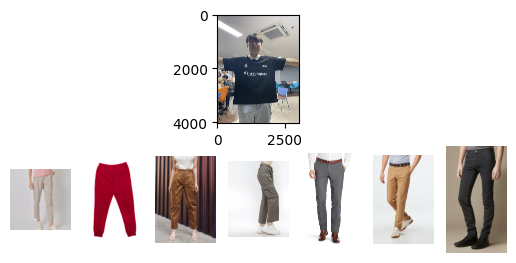

In [78]:
from matplotlib.pyplot import figure, imshow, axis
fig = figure()
data_dir = 'data/Test/Bottomwear/'
a = fig.add_subplot(3, 1, 1)
topwear = cv2.imread(os.path.join('data/Test/Topwear/Park.jpg'))
imshow(cv2.cvtColor(topwear, cv2.COLOR_BGR2RGB))
no = 1
for images in os.listdir(data_dir):
    a = fig.add_subplot(1, len(os.listdir(data_dir)), no)
    img = cv2.imread(os.path.join(data_dir, images))
    no += 1
    imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axis('off')